<a href="https://colab.research.google.com/github/mehkzhra/Gender-Detection/blob/main/Simple_Genderdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface
!pip install opencv-python
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: pytest
    Found existing installation: pytest 8.4.2
    Uninstalling pytest-8.4.2:
      Successfully uninstalled pytest-8.4.2


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Female.jpg to Female.jpg


In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow

def predict_gender(img_path):
    img = cv2.imread(img_path)
    cv2_imshow(img)

    analysis = DeepFace.analyze(img, actions=['gender'])
    print("\nPrediction:", analysis[0]['gender'])
    return analysis


25-12-07 12:00:46 - Directory /root/.deepface has been created
25-12-07 12:00:46 - Directory /root/.deepface/weights has been created


In [ ]:
def predict_and_show(img_path):
    img = cv2.imread(img_path)

    # --- Resize image for easier viewing ---
    max_width = 600
    height, width = img.shape[:2]

    if width > max_width:
        scale = max_width / width
        img = cv2.resize(img, (int(width * scale), int(height * scale)))

    # DeepFace Analysis
    result = DeepFace.analyze(img, actions=['gender'])

    # Extract gender correctly (handles both DeepFace formats)
    try:
        gender_dict = result[0]['gender']     # New version
    except:
        gender_dict = result['gender']        # Old version

    # Get predicted gender
    gender = max(gender_dict, key=gender_dict.get)

    # Write text on image
    img2 = img.copy()
    cv2.putText(img2, f"Gender: {gender}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

    print("Predicted Gender:", gender)
    cv2_imshow(img2)


Predicted Gender: Man


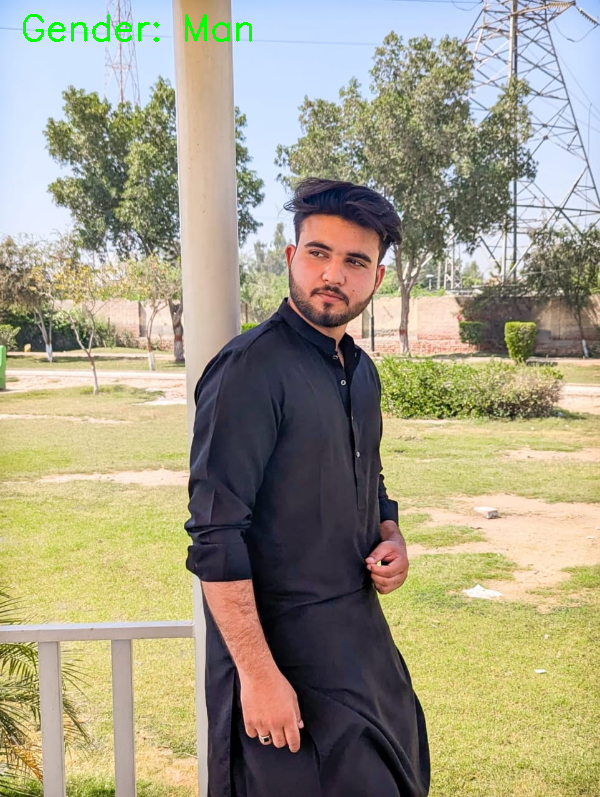

Predicted Gender: Woman


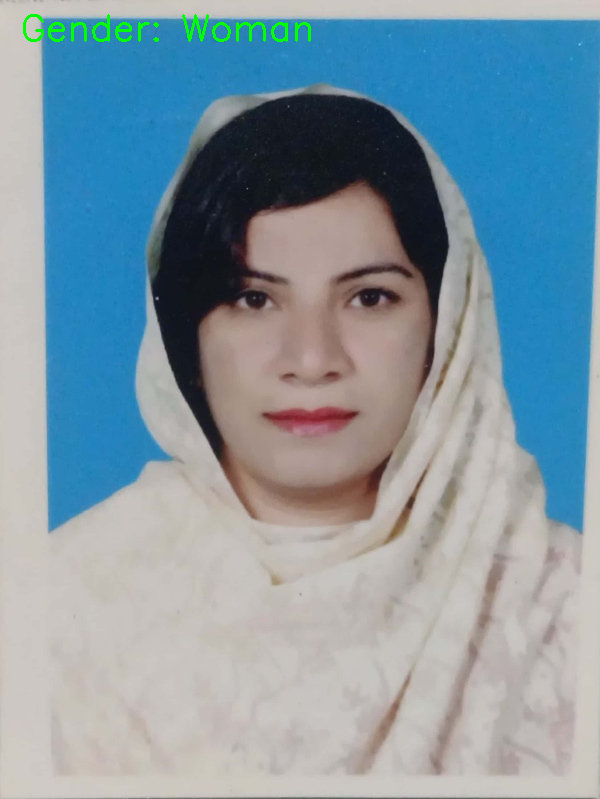

In [ ]:
predict_and_show("/content/male.img.jpeg")
predict_and_show("/content/Female.jpg")
